# CMPE 251 Project - Reddit Data Analysis
## r/formula1 Subreddit

#### Project Contributors:
- Atakan Acar 117200066
- Deniz İren 117202014
- Canberk Timurlenk 116202014

#### Supervised by:
- Savaş Yıldırım

In [1]:
import praw
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(num=None, figsize=(24, 18))
plt.rcParams['figure.figsize'] = (15, 8)
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

In [2]:
#Authorized Reddit Instance
reddit = praw.Reddit(client_id ='RV9ikffQD37vFA', 
                     client_secret ='CGmwNS64vyF_vXZHwnkba3tVIGD9eQ', 
                     user_agent ='CMPE 251 user_agent',
                     username = 'CMPE251',
                     password = 'Cmpe251') 

In [3]:
#Obtaining a Subreddit Instance
subreddit = reddit.subreddit('formula1')

In [4]:
# display the subreddit name 
print(subreddit.display_name) 
  
# display the subreddit title  
print(subreddit.title)        
  
# display the subreddit description  
print(subreddit.description) 

formula1
Formula 1
- [](/topBegin)[](#bh)
- [Hub](https://redd.it/k64wlp) [FP1](https://redd.it/k6kg2v) [FP2](https://redd.it/k6oseh) [FP3](https://redd.it/k77i1x) [Q](https://redd.it/k79xig) [PR](https://redd.it/k7ue6j) [R](https://redd.it/k7x9bw) [PR](https://redd.it/k7zd8n) [DaD](https://redd.it/k8kgdz)[](/topEnd) [Discord](https://discordapp.com/invite/WcJsaqf) [Twitter](https://twitter.com/F1Subreddit)

#
- New to Formula 1?
 - [FAQ](/r/formula1/w/faq)
 - [Wiki](/r/formula1/w/newtof1)

#
- [](/beginInfoHead)Abu Dhabi Grand Prix
 - Abu Dhabi, United Arab Emirates[](/endInfoHead)
 - [](/countDownBegin)3 days, 21 hours and 6 minutes[](/countDownEnd)
 - [f1calendar.com](http://f1calendar.com) [f1countdown.com](http://f1countdown.com)
- Event Schedule[](/beginInfoSched)
>|Session | Time (UTC)
|-|-
Free Practice 1|Fri • 09:00
Free Practice 2|Fri • 13:00
Free Practice 3|Sat • 10:00
Qualifying|Sat • 13:00
Race|Sun • 13:10[](/endInfoSched)
>[Convert](http://f1calendar.com)
>
>[Where to Wat

In [5]:
#Obtaining submissions(posts) from subreddit
#In this case, we obtain top 200 upvoted posts from this year and appending their information to a list.
submissions = []
for submission in subreddit.top('year', limit = 200):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)

In [6]:
#Submissions list shown with pandas data frame
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]

In [7]:
df

,id,title,selftext,score,num_comments,shortlink
0,inng48,Pierre Gasly wins the 2020 Italian Grand Prix!...,,61854,3638,https://redd.it/inng48
1,inr1ar,"Thanks for your support, Reddit! - Here's a sh...",,57931,870,https://redd.it/inr1ar
2,k3a1qc,Huge crash after start causing red flag,,49960,3734,https://redd.it/k3a1qc
3,is0odv,Lewis Hamilton on the top spot of the podium,,46646,2930,https://redd.it/is0odv
4,hszcuw,I am Kimi Raikkonen. AMA.,Hello.\n\nMe: [https://imgur.com/5uyT54N](http...,43714,5737,https://redd.it/hszcuw
...,...,...,...,...,...,...
195,ipstvc,Sergio Perez replies to his number 1 mechanic ...,,14041,592,https://redd.it/ipstvc
196,izh5c0,"Hey Guys, Its' been a while. Before Sochi, her...",,14016,310,https://redd.it/izh5c0
197,iv3zas,"A cool picture of Susie Wolff, Felipe Massa an...",,14005,434,https://redd.it/iv3zas
198,jndjmt,Sky F1 driver ratings after Grosjean and Russe...,,13992,842,https://redd.it/jndjmt


In [8]:
df.title

0      Pierre Gasly wins the 2020 Italian Grand Prix!...
1      Thanks for your support, Reddit! - Here's a sh...
2                Huge crash after start causing red flag
3           Lewis Hamilton on the top spot of the podium
4                              I am Kimi Raikkonen. AMA.
                             ...                        
195    Sergio Perez replies to his number 1 mechanic ...
196    Hey Guys, Its' been a while. Before Sochi, her...
197    A cool picture of Susie Wolff, Felipe Massa an...
198    Sky F1 driver ratings after Grosjean and Russe...
199    Eight years ago today, Lewis Hamilton made a s...
Name: title, Length: 200, dtype: object

In [9]:
#Stopwords to ignore while analyzing
stp=stopwords.words('english')
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#We sum every title to a single string and split it to get a list of words so we can produce a frequency distribution later
all_titles = ""
for title in df.title:
    all_titles = all_titles + " " + title.lower()
all_titles_list = all_titles.split()

#Punctuation elimination
all_titles_list = [title.translate(str.maketrans('', '', string.punctuation)) for title in all_titles_list]

#Stopword elimination
all_titles_list = [word for word in all_titles_list if word not in stp]

In [11]:
#Frequency Distribution using NLTK
fd = nltk.FreqDist(all_titles_list)

In [12]:
fd

FreqDist({'lewis': 21, 'gp': 20, 'hamilton': 19, '': 17, 'f1': 17, '2020': 16, 'race': 16, 'formula': 13, 'grand': 12, 'prix': 12, ...})

In [13]:
#Most common 200 words in post titles
fd.most_common(200)

[('lewis', 21),
 ('gp', 20),
 ('hamilton', 19),
 ('', 17),
 ('f1', 17),
 ('2020', 16),
 ('race', 16),
 ('formula', 13),
 ('grand', 12),
 ('prix', 12),
 ('vettel', 12),
 ('team', 12),
 ('podium', 10),
 ('one', 10),
 ('car', 10),
 ('racing', 9),
 ('1', 9),
 ('wins', 8),
 ('sebastian', 8),
 ('driver', 8),
 ('years', 8),
 ('verstappen', 7),
 ('first', 7),
 ('time', 7),
 ('helmet', 7),
 ('like', 7),
 ('today', 7),
 ('bottas', 7),
 ('gasly', 6),
 ('george', 6),
 ('mercedes', 6),
 ('grosjean', 6),
 ('mclaren', 6),
 ('made', 6),
 ('last', 6),
 ('instagram', 6),
 ('pierre', 5),
 ('italian', 5),
 ('sainz', 5),
 ('stroll', 5),
 ('red', 5),
 ('kimi', 5),
 ('russell', 5),
 ('williams', 5),
 ('2021', 5),
 ('michael', 5),
 ('world', 5),
 ('ot', 5),
 ('valtteri', 5),
 ('ago', 5),
 ('schumacher', 5),
 ('ricciardo', 5),
 ('norris', 5),
 ('post', 5),
 ('crash', 4),
 ('raikkonen', 4),
 ('romain', 4),
 ('back', 4),
 ('official', 4),
 ('words', 4),
 ('new', 4),
 ('track', 4),
 ('ferrari', 4),
 ('weekend', 4

In [14]:
#Here are the keywords for drivers, teams, grand prix's and team principals. We are gonna search for these keywords
#in the nltk frequency distribution.
driver_keywords = ['lewis', 'hamilton', 'ham', '44', 'valtteri', 'bottas', 'bot', '77', 'max', 'verstappen', 'ver', '33'
                  , 'alex', 'albon', 'alb', '23', 'sebastian', 'vettel', 'vet', 'seb', '5', 'charles', 'leclerc', 'lec', '16'
                  , 'carlos', 'sainz', 'sai', '55', 'lando', 'norris', 'nor', '4', 'esteban', 'ocon', 'oco', '31'
                  , 'daniel', 'ricciardo', 'ric', '3', 'sergio', 'perez', 'per', '11', 'lance', 'stroll', 'str', '18'
                  , 'pierre', 'gasly', 'gas', '10', 'daniil', 'kvyat', 'kvy', '26', 'kimi', 'raikonnen', 'räikkönen', 'rai', '7'
                  , 'antonio', 'giovanazzi', 'gio', '99', 'romain', 'grosjean', 'gro', '8'
                  , 'kevin', 'magnussen', 'mag', 'kmag', '20', 'george', 'russell', 'rus', '63'
                  , 'nicholas', 'latifi', 'lat', '6']
team_keywords = ['mercedes', 'redbull', 'bull', 'ferrari', 'mclaren', 'renault', 'racingpoint', 'point'
                 , 'alphatauri', 'tauri', 'alfaromeo', 'alfa', 'haas', 'williams']
gp_keywords = ['autria', 'styria', 'hungarian', 'british', '70th', 'spanish', 'belgian',
                'italian', 'tuscany', 'russian', 'eifel', 'portuguese', 'emilia', 'turkish', 'turkey'
               , 'bahrain', 'sakhir', 'abu', 'australian', 'chinese', 'azerbaijan', 'monaco', 'canadian'
               , 'french', 'german', 'singapore', 'japanese', 'mexican', 'states', 'brazilian']
principal_keywords = ['toto', 'wolf', 'mattia', 'binotto', 'christian', 'horner'
                       , 'cyril', 'abiteboul', 'andreas', 'seidl', 'otmar', 'szafnauer'
                       , 'franz', 'tost', 'guenther', 'steiner', 'simon', 'roberts', 'frédéric', 'vasseur', 'claire']
#Team colors for visualization
team_colors = {'mercedes': 'DarkTurquoise', 'ferrari': 'red', 'redbull': 'darkblue', 'bull': 'darkblue', 'racingpoint': 'hotpink'
               , 'point': 'hotpink', 'mclaren': 'orange', 'renault': 'yellow', 'alfa': 'darkred', 'alfaromeo': 'darkred'
              , 'alphatauri': 'Gainsboro', 'tauri': 'Gainsboro', 'haas': 'DimGray', 'williams': 'aqua'}

In [15]:
#MOST POSTED DRIVERS

#Here we search for driver keywords in our frequency distribution and create a list.
most_posted_drivers = [(word, freq) for word, freq in fd.most_common(10000) if word in driver_keywords]

In [16]:
most_posted_drivers

[('lewis', 21),
 ('hamilton', 19),
 ('vettel', 12),
 ('sebastian', 8),
 ('verstappen', 7),
 ('bottas', 7),
 ('gasly', 6),
 ('george', 6),
 ('grosjean', 6),
 ('pierre', 5),
 ('sainz', 5),
 ('stroll', 5),
 ('kimi', 5),
 ('russell', 5),
 ('valtteri', 5),
 ('ricciardo', 5),
 ('norris', 5),
 ('romain', 4),
 ('lando', 4),
 ('daniel', 4),
 ('sergio', 4),
 ('perez', 4),
 ('leclerc', 4),
 ('carlos', 3),
 ('max', 3),
 ('5', 3),
 ('albon', 3),
 ('seb', 3),
 ('lance', 2),
 ('3', 2),
 ('räikkönen', 2),
 ('bot', 2),
 ('4', 2),
 ('ham', 1),
 ('ver', 1),
 ('18', 1),
 ('kevin', 1),
 ('nicholas', 1),
 ('latifi', 1),
 ('33', 1),
 ('charles', 1)]

In [17]:
#Driver keyword frequencies shown with pandas data frame
most_posted_drivers_df = pd.DataFrame(most_posted_drivers)
most_posted_drivers_df.columns = ['keywords', 'frequency']
most_posted_drivers_df

,keywords,frequency
0,lewis,21
1,hamilton,19
2,vettel,12
3,sebastian,8
4,verstappen,7
5,bottas,7
6,gasly,6
7,george,6
8,grosjean,6
9,pierre,5


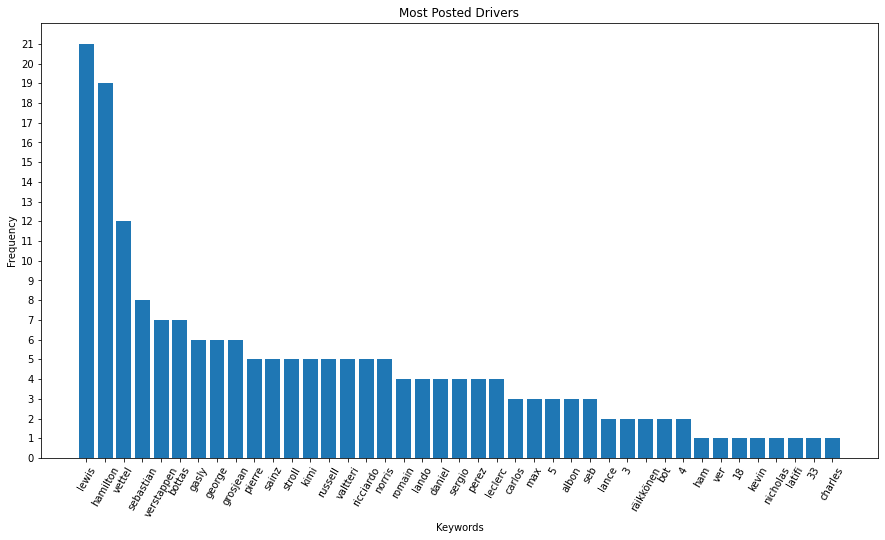

In [18]:
#Driver keyword frequencies shown with matplotlib bar chart
drivers = [word for word, freq in most_posted_drivers]
frequencies = [freq for word, freq in most_posted_drivers]
plt.bar(drivers, frequencies)
plt.title('Most Posted Drivers')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation = 60)
plt.yticks([n for n in range(int(max(frequencies))+1)])
plt.show()

In [19]:
#MOST POSTED TEAMS

#Here we search for team keywords in our frequency distribution and create a list.
most_posted_teams = [(word, freq) for word, freq in fd.most_common(10000) if word in team_keywords]

In [20]:
most_posted_teams

[('mercedes', 6),
 ('mclaren', 6),
 ('williams', 5),
 ('ferrari', 4),
 ('point', 4),
 ('renault', 3),
 ('bull', 3),
 ('haas', 2),
 ('tauri', 1),
 ('alfa', 1)]

In [21]:
#Driver keyword frequencies shown with pandas data frame
most_posted_teams_df = pd.DataFrame(most_posted_teams)
most_posted_teams_df.columns = ['keywords', 'frequency']
most_posted_teams_df

,keywords,frequency
0,mercedes,6
1,mclaren,6
2,williams,5
3,ferrari,4
4,point,4
5,renault,3
6,bull,3
7,haas,2
8,tauri,1
9,alfa,1


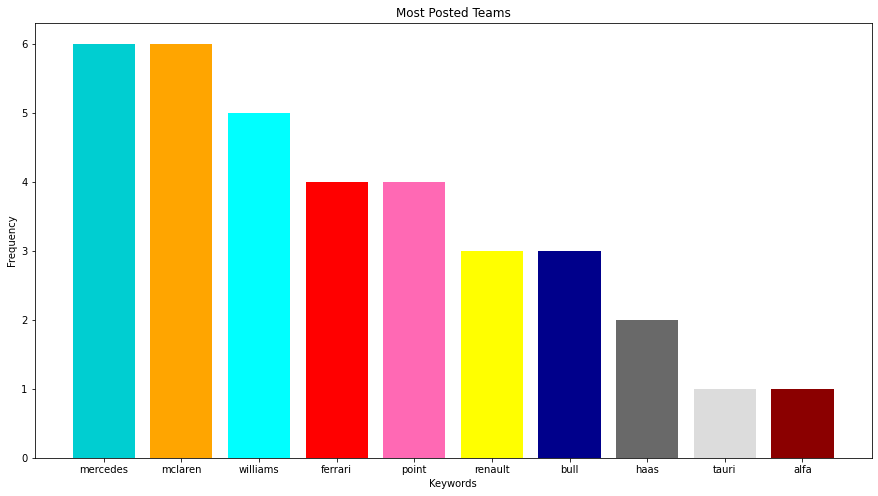

In [22]:
#Team keyword frequencies shown with matplotlib bar chart (team_colors used)
teams = [word for word, freq in most_posted_teams]
frequencies = [freq for word, freq in most_posted_teams]
colors = [team_colors[team] for team in teams]
plt.bar(teams, frequencies, color = colors)
plt.title('Most Posted Teams')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.yticks([n for n in range(int(max(frequencies))+1)])
plt.show()

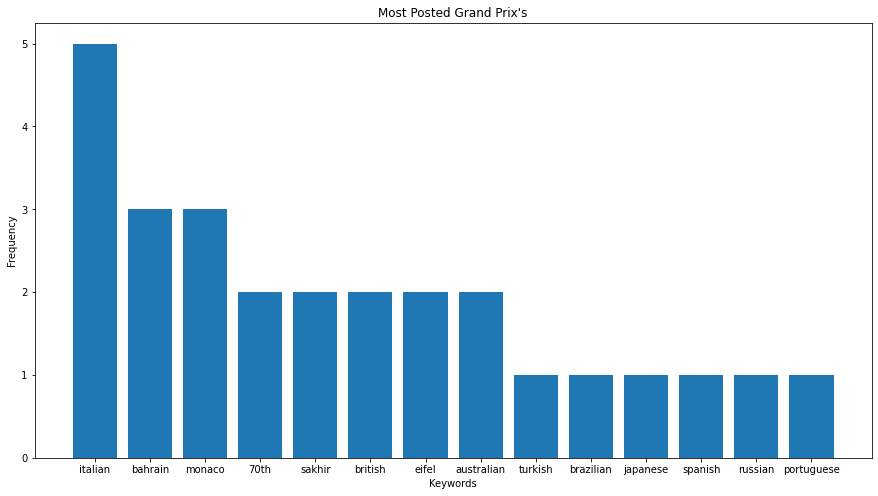

In [23]:
#MOST POSTED GRAND PRIX's

##Here we search for grand prix keywords in our frequency distribution. It is same as previous searches.
most_posted_gps = [(word, freq) for word, freq in fd.most_common(10000) if word in gp_keywords]
most_posted_gps_df = pd.DataFrame(most_posted_gps)
most_posted_gps_df.columns = ['keywords', 'frequency']
gps = [word for word, freq in most_posted_gps]
frequencies = [freq for word, freq in most_posted_gps]
plt.bar(gps, frequencies)
plt.title('Most Posted Grand Prix\'s')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.yticks([n for n in range(int(max(frequencies))+1)])
plt.show()

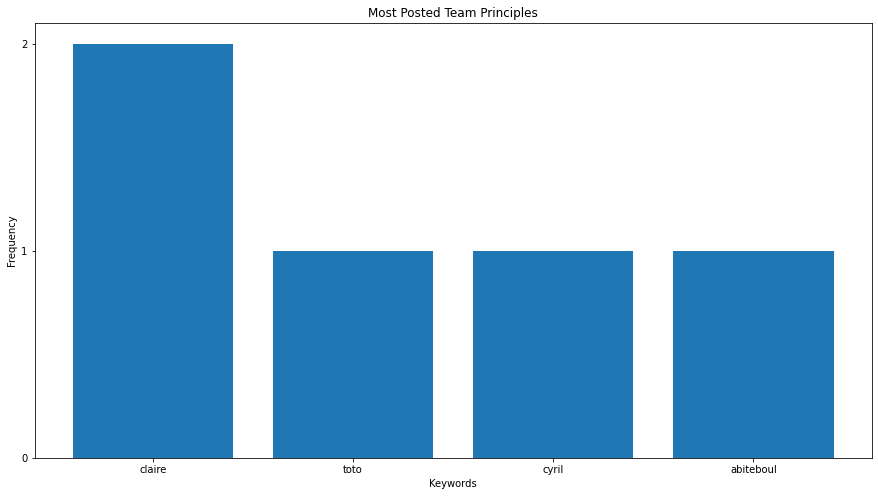

In [24]:
#MOST POSTED TEAM PRINCIPALS

##Here we search for team principal keywords in our frequency distribution. It is same as previous searches.
most_posted_principals = [(word, freq) for word, freq in fd.most_common(10000) if word in principal_keywords]
most_posted_principals_df = pd.DataFrame(most_posted_principals)
most_posted_principals_df.columns = ['keywords', 'frequency']
principals = [word for word, freq in most_posted_principals]
frequencies = [freq for word, freq in most_posted_principals]
plt.bar(principals, frequencies)
plt.title('Most Posted Team Principles')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.yticks([n for n in range(int(max(frequencies))+1)])
plt.show()

In [25]:
#MOST UPVOTED POSTS(this month)
submissions = []
for submission in subreddit.top('month', limit = 10):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

,id,title,selftext,score,num_comments,shortlink
0,k3a1qc,Huge crash after start causing red flag,,49961,3734,https://redd.it/k3a1qc
1,k7zdg9,Sergio Perez wins the Sakhir Grand Prix! Ocon ...,,38529,2882,https://redd.it/k7zdg9
2,k54hkt,[Formula 1] BREAKING: George Russell will driv...,,36342,3062,https://redd.it/k54hkt
3,js846d,This is hilarious.,,34725,480,https://redd.it/js846d
4,k6k4lr,George in his 2020 Mercedes Race Suit,,33240,754,https://redd.it/k6k4lr
5,k60r86,Romain meeting the two firefighters who were f...,,32188,461,https://redd.it/k60r86
6,k3sflu,I did a real fast 3d render for any doubters l...,,30904,1345,https://redd.it/k3sflu
7,jukt6k,Vettel is back on the podium for the first tim...,,30736,986,https://redd.it/jukt6k
8,k784vv,Grosjean: Haters and fire resistant,,30308,627,https://redd.it/k784vv
9,k44bw4,[@LucasdiGrassi] Stop saying the world “miracl...,,28201,1194,https://redd.it/k44bw4


In [26]:
#MOST UPVOTED POSTS(this day)
submissions = []
for submission in subreddit.top('day', limit = 10):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

,id,title,selftext,score,num_comments,shortlink
0,k9an91,As this week is gonna be Vettel's last time wi...,,20610,438,https://redd.it/k9an91
1,k9hg80,Safe for work (blurred) - Nikita Mazepin's del...,,13002,2386,https://redd.it/k9hg80
2,k95zep,Bottas posted this on his bike ride today. Ano...,,10844,638,https://redd.it/k95zep
3,k9er4h,Ferrari mechanics watching Bottas' pit stop,,7812,194,https://redd.it/k9er4h
4,k9pj8b,[@HaasF1Team] Haas F1 Team does not condone th...,,7990,1336,https://redd.it/k9pj8b
5,k9af1n,[Mercedes AMG F1] It's just instagram bio. Don...,,3513,197,https://redd.it/k9af1n
6,k9bb4b,"[@motorsport_geek] - ""According to RTL, Red Bu...",,2768,512,https://redd.it/k9bb4b
7,k9fwz6,A Star Is Born. My first F1 fan speed art made...,,2593,59,https://redd.it/k9fwz6
8,k9n2ux,[Hazel Southwell] Yes I have seen the Mazepin ...,,1987,655,https://redd.it/k9n2ux
9,k9dlen,[redbullracing] Are we in our drivers’ Instagr...,,1833,64,https://redd.it/k9dlen


In [27]:
#CONTROVERSIAL POSTS
submissions = []
for submission in subreddit.controversial('year', limit = 10):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

,id,title,selftext,score,num_comments,shortlink
0,gyzraq,Open Letter to Steve Huffman and the Board of ...,,37,521,https://redd.it/gyzraq
1,ipjyb3,Unpopular? Opinion: Kimi is rude af and unlike...,All his radios are him bullying the whoever is...,93,233,https://redd.it/ipjyb3
2,ijyf5g,"[Hazel Southwell on Twitter] ""Sorry if we've g...",,0,380,https://redd.it/ijyf5g
3,hd7odn,Lewis Hamilton continues to urge others to be ...,,54,272,https://redd.it/hd7odn
4,jgqqkn,[Chain Bear] So to clarify for anyone - the R ...,,231,599,https://redd.it/jgqqkn
5,el9k4p,Which drivers were over/under-rated in 2019?,,11,39,https://redd.it/el9k4p
6,hsoftl,Lewis Hamilton on Black Power salute: Moment I...,,9,76,https://redd.it/hsoftl
7,ihdp03,Why is there a myth among some fans that Hamil...,I have noticed in some comments and posters th...,23,120,https://redd.it/ihdp03
8,jeqze6,Which f1 driver do you have a crush on?,I’ll go first. George Russell 😍,1,67,https://redd.it/jeqze6
9,ipbziy,Interesting Detail - Williams is the only team...,,4,43,https://redd.it/ipbziy


In [28]:
#HOT POSTS RIGHT NOW
submissions = []
for submission in subreddit.hot(limit = 10):
    s = [submission.id, submission.title, submission.selftext, submission.score, submission.num_comments, submission.shortlink]
    submissions.append(s)
df = pd.DataFrame(submissions)
df.columns=["id", "title", "selftext", "score", "num_comments", "shortlink"]
df

,id,title,selftext,score,num_comments,shortlink
0,k7tlbi,"Hey Reddit! I'm Pierre Gasly, Formula 1 Driver...","Hi guys, let's do this again! Send me your que...",11155,1657,https://redd.it/k7tlbi
1,k9n4ib,Ask /r/formula1 Anything - Daily Discussion - ...,#Welcome to the /r/formula1 Daily Discussion /...,49,301,https://redd.it/k9n4ib
2,k9pj8b,[@HaasF1Team] Haas F1 Team does not condone th...,,8005,1337,https://redd.it/k9pj8b
3,k9r5yr,Ferrari's poster for Abu Dhabi and Seb's final...,,2391,127,https://redd.it/k9r5yr
4,k9ptth,The girls statement on Nikita his insta story,,2112,1096,https://redd.it/k9ptth
5,k9t6r4,[Mercedes-AMG PETRONAS F1 Team] Someone asked ...,,978,41,https://redd.it/k9t6r4
6,k9pgkd,[Luke Smith] Haas has issued a statement sayin...,,1263,193,https://redd.it/k9pgkd
7,k9hg80,Safe for work (blurred) - Nikita Mazepin's del...,,13000,2386,https://redd.it/k9hg80
8,k9q3fj,Bono coaching Russel through the first safety ...,,984,161,https://redd.it/k9q3fj
9,k9qims,2011-2020 Driver podium percentages,,874,104,https://redd.it/k9qims
